In [1]:
!nvidia-smi

Sun Apr 28 16:51:58 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:06:00.0 Off |                    0 |
| N/A   31C    P0    41W / 163W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setup environment

In [1]:
%load_ext autoreload
%autoreload 2

## Infer

In [2]:
workspace_dir = '/nfs/Workspace/CardiacSegV2'

import os
import sys
from pathlib import PurePath
sys.path.append(workspace_dir)

import pandas as pd

from monai.transforms import (
   Compose,
   AddChanneld,
   EnsureChannelFirstd,
   LoadImaged,
   Orientationd,
   SqueezeDimd,
   LoadImage
)

from datasets.chgh_dataset import get_data_dicts
from data_utils.utils import get_pid_by_file
from data_utils.visualization import show_img_lbl, show_img_lbl_pred, show_img_lbl_preds, show_img_lbl_preds_overlap

from expers.infer_utils import get_tune_model_dir, get_data_path, get_pred_path

model_name = 'unetcnx_a1' #unet3d attention_unet DynUNet cotr unetr swinunetr unetcnx_a1 unest testnet
data_name = 'mmwhs2'
sub_data_dir_name = 'mmwhs_train'
exp_name = 'exp_mmwhs_2' #exp_mmwhs_2 exp_mmwhs_2_511_lr7_res_cbam_bv5_vv2
data_dict_file_name = 'exp_mmwhs2.json'

root_exp_dir = os.path.join(
    workspace_dir, 
    'exps',
    'exps',
    model_name,
    data_name,
    'tune_results'
)

root_data_dir = os.path.join(
    workspace_dir, 
    'dataset',
    data_name
)

data_dir = os.path.join(root_data_dir, sub_data_dir_name)

model_dir = get_tune_model_dir(root_exp_dir, exp_name)

best_checkpoint = os.path.join(model_dir, 'best_model.pth')
final_checkpoint = os.path.join(model_dir, 'final_model.pth')

infer_dir = os.path.join(
    workspace_dir, 
    'exps',
    'exps',
    model_name,
    data_name,
    'infers',
    exp_name,
)

print('\nbest model:',best_checkpoint)
print('infer dir:',infer_dir)

pid = 'ct_train_1001_image'
print(data_dir)
print(data_name)
data_dict = get_data_path(data_dir, data_name, pid)

data_dict['pred'] = get_pred_path(root_exp_dir, exp_name, data_dict['image'])

img_pth = data_dict['image']
lbl_pth = data_dict['label'] 
print(img_pth)
print(lbl_pth)
print(data_dict['pred'])


/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Package pickle5 becomes unnecessary in Python 3.8 and above. Its presence may confuse libraries including Ray. Please uninstall the package.


Loading results from /nfs/Workspace/CardiacSegV2/exps/exps/unest/mmwhs2/tune_results/exp_mmwhs_2...


Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.



Best trial dd2da_00000: 
config: {'exp': {'exp': 'exp_mmwhs_2'}}
tt_dice: 0
tt_hd95: 0
esc: 0
best log dir: /nfs/Workspace/CardiacSegV2/exps/exps/unest/mmwhs2/tune_results/exp_mmwhs_2/main_dd2da_00000_0_exp=exp_exp_mmwhs_2_2024-06-11_09-42-06

best model: /nfs/Workspace/CardiacSegV2/exps/exps/unest/mmwhs2/tune_results/exp_mmwhs_2/main_dd2da_00000_0_exp=exp_exp_mmwhs_2_2024-06-11_09-42-06/models/best_model.pth
infer dir: /nfs/Workspace/CardiacSegV2/exps/exps/unest/mmwhs2/infers/exp_mmwhs_2
/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train
mmwhs2
/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_image.nii.gz
/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_label.nii.gz
/nfs/Workspace/CardiacSegV2/exps/exps/unest/mmwhs2/tune_results/infers/exp_mmwhs_2/ct_train_1001_image.nii.gz


## Infer TestNet

In [19]:
!/opt/conda/bin/python /nfs/Workspace/CardiacSegV2/expers/infer.py \
--model_name={model_name} \
--data_name={data_name} \
--data_dir={data_dir} \
--model_dir={model_dir} \
--infer_dir={infer_dir} \
--checkpoint={best_checkpoint} \
--img_pth={img_pth} \
--lbl_pth={lbl_pth} \
--out_channels=2 \
--patch_size=2 \
--feature_size=48 \
--drop_rate=0.1 \
--depths 3 3 9 3 \
--kernel_size 7 \
--exp_rate 4 \
--norm_name='layer' \
--a_min=-70 \
--a_max=677 \
--space_x=1.0 \
--space_y=1.0 \
--space_z=1.0 \
--roi_x=96 \
--roi_y=96 \
--roi_z=96 \
--infer_post_process

cuda is available
model: unest
=> loaded checkpoint '/nfs/Workspace/CardiacSegV2/exps/exps/unest/mmwhs2/tune_results/exp_mmwhs_2/main_dd2da_00000_0_exp=exp_exp_mmwhs_2_2024-06-11_09-42-06/models/best_model.pth')
infer data: {'image': '/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_image.nii.gz', 'label': '/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_label.nii.gz'}
monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
<class 'monai.transforms.utility.dictionary.AddChanneld'>: Class `AddChanneld` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirstd instead with `channel_dim='no_channel'`.
monai.transforms.utility.dictionary EnsureChannelFirstd.__init__:meta_keys: Argum

## Infer UNetCNX and other

In [ ]:
!/opt/conda/bin/python /nfs/Workspace/CardiacSegV2/expers/infer.py \
--model_name={model_name} \
--data_name={data_name} \
--data_dir={data_dir} \
--model_dir={model_dir} \
--infer_dir={infer_dir} \
--checkpoint={best_checkpoint} \
--img_pth={img_pth} \
--lbl_pth={lbl_pth} \
--out_channels=2 \
--patch_size=4 \
--feature_size=48 \
--drop_rate=0.1 \
--depths 3 3 9 3 \
--kernel_size 7 \
--exp_rate 4 \
--norm_name='layer' \
--a_min=-70 \
--a_max=677 \
--space_x=1.0 \
--space_y=1.0 \
--space_z=1.0 \
--roi_x=96 \
--roi_y=96 \
--roi_z=96 \
--infer_post_process

# Summarize exp results

## summartize data dict and dice, save out dir

In [3]:
import os
from pprint import pprint
import shutil

from expers.infer_utils import get_data_path, get_pred_path, get_tune_dir, get_eval_csv_path, get_eda_eval_csv_path, get_eval_val


pid = 'ct_train_1001_image'
root_dir = '/nfs/Workspace/CardiacSegV2/exps/exps'

%cd {root_dir}

data_name = 'mmwhs2'
model_names = ['unet3d', 'attention_unet','DynUNet', 'cotr', 'unetr', 'swinunetr', 'unest', 'unetcnx_a1', 'testnet']
exp_names = ['exp_mmwhs_2', 'exp_mmwhs_2', 'exp_mmwhs_2', 'exp_mmwhs_2', 'exp_mmwhs_2_lr1', 'exp_mmwhs_2_lr8', 'exp_mmwhs_2_lr1', 'exp_mmwhs_2', 'exp_mmwhs_2_511_lr7_res_cbam_bv5_vv2']
root_exp_dirs = [os.path.join(root_dir, m, 'mmwhs2') for m in model_names]


is_save_output = True
is_post_process = False # post process infer (eda eval csv)
abs_tune_dirs = None #['/nfs/Workspace/CardiacSeg/exps/exps/unetcnx_a1/chgh/tune_results/exp_b7_9_ds1_tn1/main_5cbaa_00000_0_optim=lr_0_0007_weight_decay_0_0005_2023-05-17_05-19-13']

out_dir = './mmwhs2_output'
out_infer_dir = os.path.join(out_dir, 'infers')
out_eval_dir = os.path.join(out_dir, 'evals')
os.makedirs(os.path.join(out_dir), exist_ok=True)
os.makedirs(os.path.join(out_infer_dir), exist_ok=True)
os.makedirs(os.path.join(out_eval_dir), exist_ok=True)


data_dict = get_data_path(data_dir, data_name, pid)
dice_dict = {}
for i, (exp_name, model_name, root_exp_dir) in enumerate(zip(exp_names, model_names, root_exp_dirs)):
    key = f'{model_name}'
    
    # add pred path to data dict
    data_dict[key] = get_pred_path(root_exp_dir, exp_name, data_dict['image'])

    # read dice by pid
    tune_dir = abs_tune_dirs[i] if abs_tune_dirs else get_tune_dir(os.path.join(root_exp_dir, 'tune_results', exp_name))
    csv_pth = get_eda_eval_csv_path(tune_dir) if is_post_process else get_eval_csv_path(tune_dir)
    dice_dict[key] = get_eval_val(csv_pth, pid)
    
    if is_save_output:
        # copy pred file
        shutil.copyfile(data_dict[key], os.path.join(out_infer_dir, f'{model_name}_{pid}.nii.gz'))

        # copy csv file
        shutil.copyfile(csv_pth, os.path.join(out_eval_dir, f'{model_name}_best_model.csv'))


pprint(data_dict)
pprint(dice_dict)

/nfs/Workspace/CardiacSegV2/exps/exps


using dhist requires you to install the `pickleshare` library.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from version 2.5. Please specify the trainable to avoid this warning.
Passing in the experiment's `trainable` will be a required argument to `Tuner.restore` starting from versio

{'DynUNet': '/nfs/Workspace/CardiacSegV2/exps/exps/DynUNet/mmwhs2/infers/exp_mmwhs_2/ct_train_1001_image.nii.gz',
 'attention_unet': '/nfs/Workspace/CardiacSegV2/exps/exps/attention_unet/mmwhs2/infers/exp_mmwhs_2/ct_train_1001_image.nii.gz',
 'cotr': '/nfs/Workspace/CardiacSegV2/exps/exps/cotr/mmwhs2/infers/exp_mmwhs_2/ct_train_1001_image.nii.gz',
 'image': '/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_image.nii.gz',
 'label': '/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_label.nii.gz',
 'swinunetr': '/nfs/Workspace/CardiacSegV2/exps/exps/swinunetr/mmwhs2/infers/exp_mmwhs_2/ct_train_1001_image.nii.gz',
 'testnet': '/nfs/Workspace/CardiacSegV2/exps/exps/testnet/mmwhs2/infers/exp_mmwhs_2/ct_train_1001_image.nii.gz',
 'unest': '/nfs/Workspace/CardiacSegV2/exps/exps/unest/mmwhs2/infers/exp_mmwhs_2/ct_train_1001_image.nii.gz',
 'unet3d': '/nfs/Workspace/CardiacSegV2/exps/exps/unet3d/mmwhs2/infers/exp_mmwhs_2/ct_trai

## load out dir

In [4]:
import os
from pprint import pprint
import shutil

from expers.infer_utils import get_data_path, get_pred_path, get_tune_dir, get_eval_csv_path, get_eval_val

out_dir = './mmwhs2_output'
out_infer_dir = os.path.join(out_dir, 'infers')
out_eval_dir = os.path.join(out_dir, 'evals')


data_dict = get_data_path(data_dir, data_name, pid)

model_names = ['unet3d', 'attention_unet','DynUNet', 'cotr', 'unetr', 'swinunetr', 'unetcnx_a1', 'unest', 'testnet']
for model_name in model_names:
    pred_path = os.path.join(out_infer_dir, f'{model_name}_{pid}.nii.gz')
    data_dict[model_name] = pred_path
    
    csv_pth = os.path.join(out_eval_dir, f'{model_name}_best_model.csv')
    dice_dict[model_name] = get_eval_val(csv_pth, pid)['dice']

pprint(data_dict)
pprint(dice_dict)

{'DynUNet': './mmwhs_output/infers/DynUNet_ct_train_1001_image.nii.gz',
 'attention_unet': './mmwhs_output/infers/attention_unet_ct_train_1001_image.nii.gz',
 'cotr': './mmwhs_output/infers/cotr_ct_train_1001_image.nii.gz',
 'image': '/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_image.nii.gz',
 'label': '/nfs/Workspace/CardiacSegV2/dataset/mmwhs2/mmwhs_train/ct_train_1001/ct_train_1001_label.nii.gz',
 'swinunetr': './mmwhs_output/infers/swinunetr_ct_train_1001_image.nii.gz',
 'testnet': './mmwhs_output/infers/testnet_ct_train_1001_image.nii.gz',
 'unest': './mmwhs_output/infers/unest_ct_train_1001_image.nii.gz',
 'unet3d': './mmwhs_output/infers/unet3d_ct_train_1001_image.nii.gz',
 'unetcnx_a1': './mmwhs_output/infers/unetcnx_a1_ct_train_1001_image.nii.gz',
 'unetr': './mmwhs_output/infers/unetr_ct_train_1001_image.nii.gz'}
{'DynUNet': 0.8199412,
 'attention_unet': 0.8306613,
 'cotr': 0.57322466,
 'swinunetr': 0.71357745,
 'testnet': 0.75297534,
 '

# Show exp results

In [5]:
keys = list(data_dict.keys())

loader = Compose([
    LoadImaged(keys=keys),
    EnsureChannelFirstd(keys=keys),
    Orientationd(keys=keys, axcodes='PLI'), #PLI
    SqueezeDimd(keys=keys)
])

data = loader(data_dict)

monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.


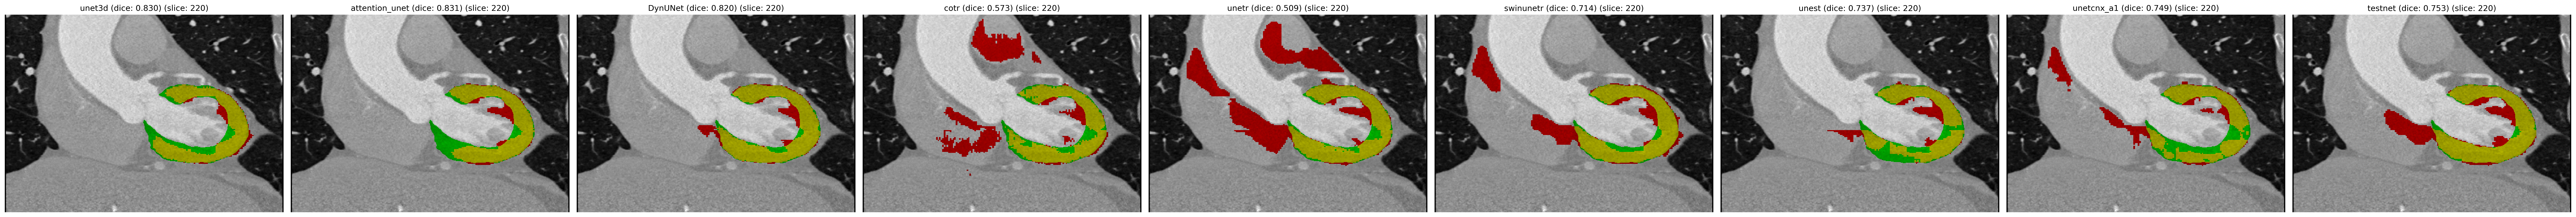

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams["figure.facecolor"] = 'none'

from expers.infer_utils import get_img_lbl_preds

num_classes = 2
slice_idxs = [220] #[100,150,200,250] #210
alpha = 0.5
axis_off = True
#num_img = len(data_dict)
#fig_size = (num_img*5, num_img*len(slice_idxs))
num_img = len(data_dict) - 2 
fig_size = (num_img*6, len(slice_idxs)*6)
show_img = False
show_lbl_dc = True

keys = dice_dict.keys()

pred_titles = [f'{key} (dice: {dice_dict[key]:.3f})'for key in keys]

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='c', is_trans=True)

# show_img_lbl_preds
show_img_lbl_preds_overlap(
    imgs,
    lbls,
    preds,
    pred_titles,
    slice_idxs,
    num_classes,
    axis_off,
    alpha,
    fig_size,
    show_img, 
    show_lbl_dc
)

In [37]:
slice_idxs = [220] # [200,250,350]
fig_size = (num_img*6, len(slice_idxs)*6)

imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='c', is_trans=True)
# imgs, lbls, preds = get_img_lbl_preds(data, keys, slice_idxs, mode='a')

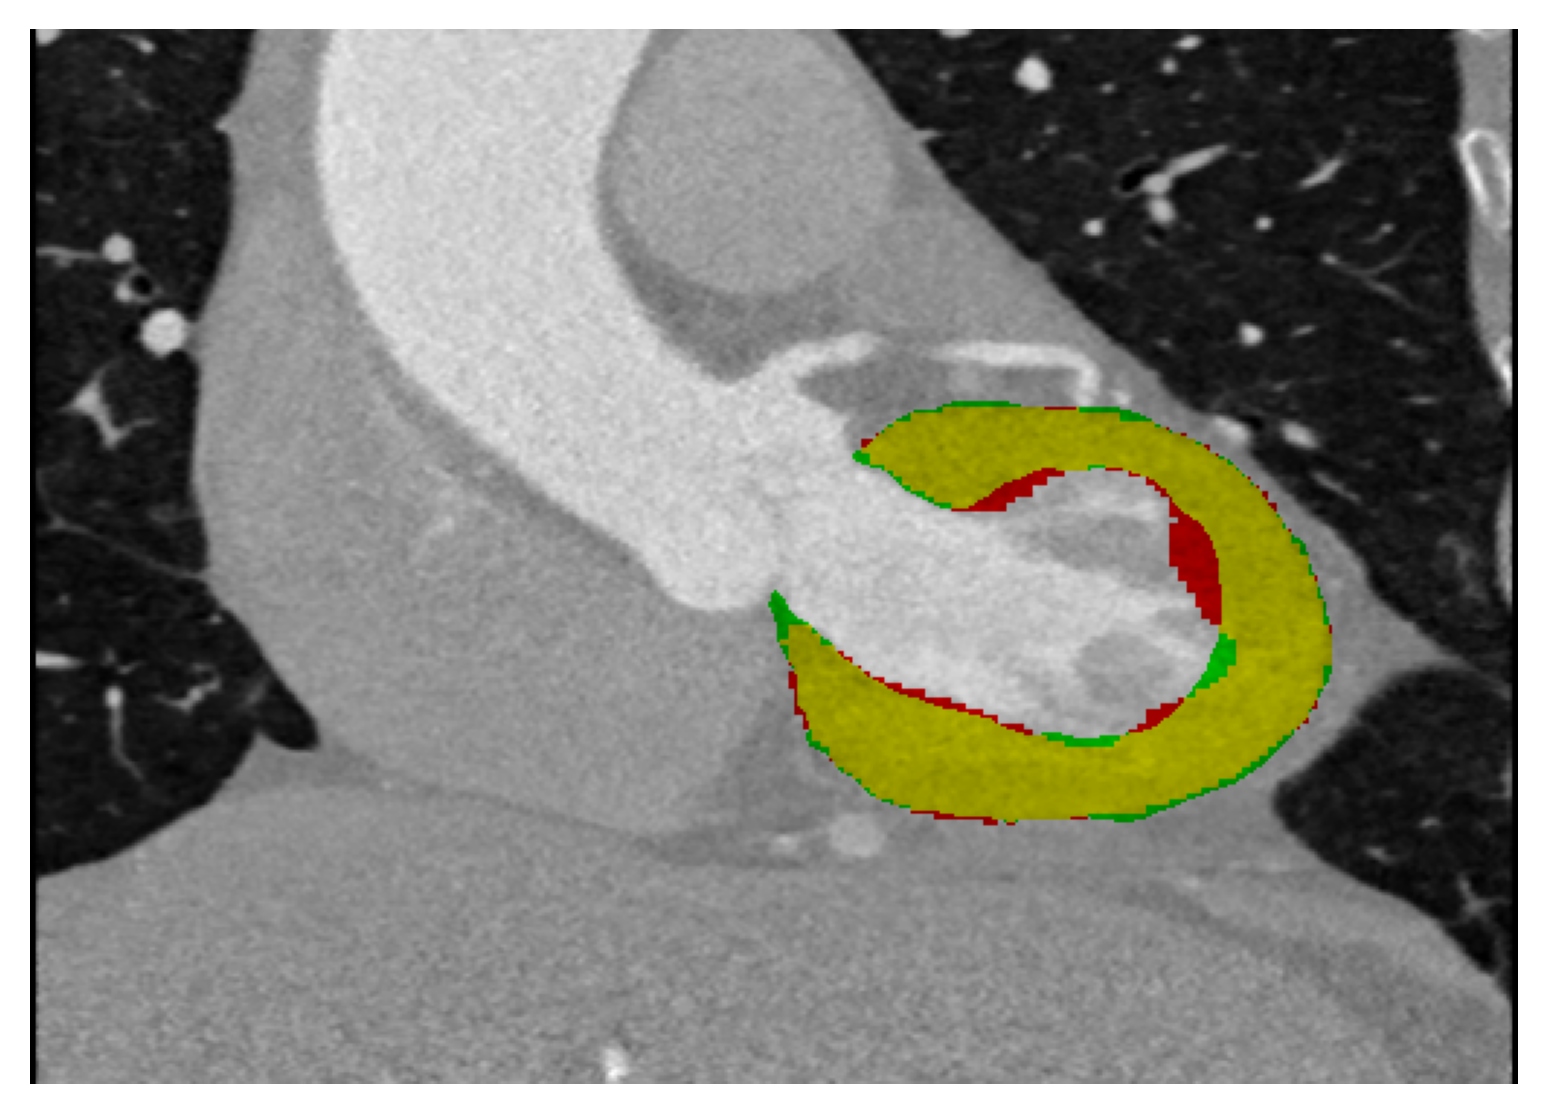

In [36]:
from data_utils.visualization import get_pred_label_overlap_img

out_dir = './mmwhs2_output'
pid = 'ct_train_1001'
out_vis_dir = os.path.join(out_dir, 'vis')
os.makedirs(out_vis_dir, exist_ok=True)

img, lbl = imgs[0], lbls[0]
for pred, model_name in zip(preds[0], keys):
    overlap_img = get_pred_label_overlap_img(img, pred, lbl)
    plt.imshow(overlap_img)
    plt.axis('off')
    plt.savefig(
        os.path.join(out_vis_dir, f'{model_name}_{pid}_c_new.png'),
        bbox_inches='tight', 
        pad_inches=0
    )

In [38]:
!zip -r {out_dir}.zip {out_dir}

  adding: mmwhs_output/ (stored 0%)
  adding: mmwhs_output/infers/ (stored 0%)
  adding: mmwhs_output/infers/unet3d_ct_train_1001_image.nii.gz (deflated 81%)
  adding: mmwhs_output/infers/attention_unet_ct_train_1001_image.nii.gz (deflated 81%)
  adding: mmwhs_output/infers/DynUNet_ct_train_1001_image.nii.gz (deflated 80%)
  adding: mmwhs_output/infers/cotr_ct_train_1001_image.nii.gz (deflated 81%)
  adding: mmwhs_output/infers/unetr_ct_train_1001_image.nii.gz (deflated 80%)
  adding: mmwhs_output/infers/swinunetr_ct_train_1001_image.nii.gz (deflated 80%)
  adding: mmwhs_output/infers/unest_ct_train_1001_image.nii.gz (deflated 81%)
  adding: mmwhs_output/infers/unetcnx_a1_ct_train_1001_image.nii.gz (deflated 81%)
  adding: mmwhs_output/infers/testnet_ct_train_1001_image.nii.gz (deflated 80%)
  adding: mmwhs_output/evals/ (stored 0%)
  adding: mmwhs_output/evals/unet3d_best_model.csv (deflated 48%)
  adding: mmwhs_output/evals/attention_unet_best_model.csv (deflated 44%)
  adding: mmwhs